## <center><font color=navy>Algorithmic Trading in Python</font></center>
### <center>Algo Trading Strategies and Paradigms</center>
#### <center>Ali Habibnia</center>


  ○ 	Developing an AlgoTrading System Process


    1. Trading​ ​Strategy:​
    2. Programming​ ​skills:
    3. Trading​ ​software:​
    4. Data: (Ex: alternative data)
    5. Backend​ ​infrastructure:
    6. Regulatory approval:


**All the algorithmic trading strategies that are being used today can be classified broadly into the following​ ​categories:**


# Trend- and Momentum-Based Strategies

Trend- and momentum-based trading strategies are investment techniques that seek to capitalize on the continued movement of an asset in a particular direction. These strategies are often used by traders in various financial markets, such as stocks, forex, commodities, and others. Here's a more detailed explanation:

### 1. Trend-Based Trading Strategies
Trend-based trading strategies aim to identify the general direction in which a market or asset is moving and then take positions in that direction.

#### a. Trend Following:
This strategy involves buying assets that are trending upward and selling assets that are trending downward. The idea is to ride the trend until it shows signs of reversal.

#### b. Moving Averages:
Traders often use moving averages (e.g., simple moving average or exponential moving average) to identify the direction of a trend. For example, a buy signal may be generated when a short-term moving average crosses above a long-term moving average.

#### c. Breakout Strategies:
These strategies look for prices to move outside of a defined range or past a certain level (resistance or support) as a sign that the trend will continue.

#### d. Channel Trading:
This involves identifying a channel within which an asset is trading and taking positions based on the asset's position within the channel, buying at the lower end and selling at the upper end.

### 2. Momentum-Based Trading Strategies
Momentum strategies are based on the idea that assets that have performed well in the past will continue to do well in the future, and those that have performed poorly will continue to do poorly.

#### a. Momentum Indicator Strategies:
These strategies use various momentum indicators like the Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), or Stochastic Oscillator to gauge the momentum of an asset.

#### b. Rate of Change (ROC):
This method compares the current price to the price a certain number of periods ago to determine if an asset has momentum.

#### c. Time-Series Momentum:
This strategy is based on the idea that an asset's past returns predict its future returns. If an asset has been trending up over a given period, the trader may expect the upward trend to continue.

#### d. High-Frequency Momentum Strategies:
These are often used by algorithmic traders and use very short time frames to identify and capitalize on quick shifts in momentum.

### Conclusion
Both trend- and momentum-based strategies can be effective in different market environments. Trend strategies typically perform well in markets with clear and sustained directional moves, while momentum strategies can capture profits from continued price movement based on various factors like trading volume, volatility, and other market dynamics. 

Successful application of these strategies requires careful analysis, risk management, and often a good understanding of the underlying asset and market conditions. Many traders also use technical indicators, chart patterns, and sometimes fundamental analysis in conjunction with these strategies to increase the odds of success.

### Showcase 1: Moving average crossover


Moving average crossover is considered as "Hello word" and the first step when you want to delve into algorithmic trading strategies and Quantitative trading.

The first type of crossover strategies is price crossover;


1. Calculate n day **SMA**
2. **Long position:** Enter trade when price closes above the moving average. Exit the trade when the price closes below the moving average.
3. **Short position:** Sell Short when price closes below the moving average. Buy to Cover when price closes above the moving average





In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


*   Get OHLC data

*   Stock name: ***Goldman Sachs Group Inc (GS)***


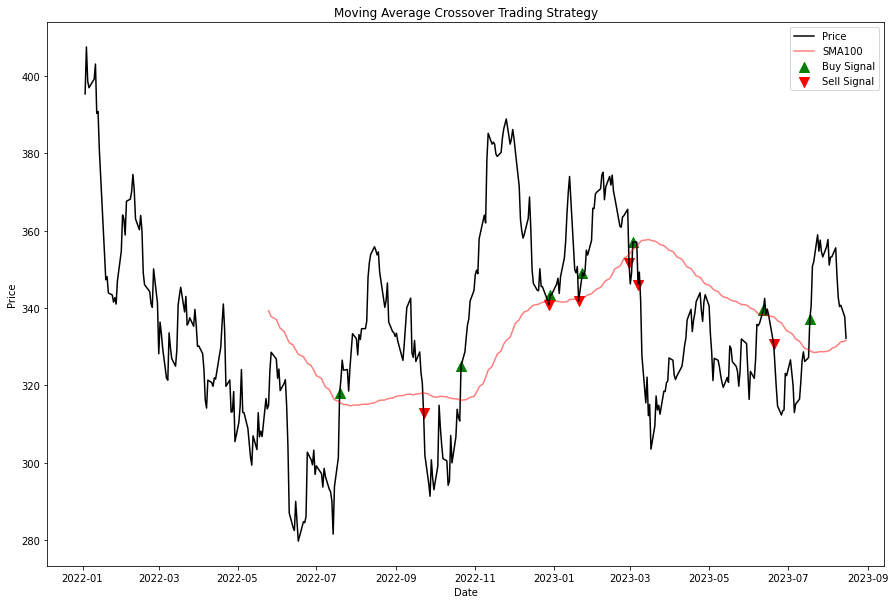

In [126]:
# Download data from Yahoo Finance
df = yf.download('GS', start='2022-01-01', progress=False)

# Calculate the 100-day Simple Moving Average
df['SMA100'] = df['Close'].rolling(window=100).mean()

# Identify Buy and Sell signals
df['Signal'] = 0  # Default to no signal
df.loc[df['Close'] > df['SMA100'], 'Signal'] = 1  # Signal above SMA
df.loc[df['Close'] < df['SMA100'], 'Signal'] = -1  # Signal below SMA
df['Position'] = df['Signal'] - df['Signal'].shift(1)  # Determine where the position changes

# Buy signals occur when Position is 2 (crossing from -1 to 1), sell signals when Position is -2 (crossing from 1 to -1)
buy_signals = df[df['Position'] == 2]
sell_signals = df[df['Position'] == -2]

# Plot the data
plt.figure(figsize=(15, 10))
plt.plot(df['Close'], label='Price', color='black', alpha=1)
plt.plot(df['SMA100'], label='SMA100', color='red', alpha=0.5)
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1, s=100)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1, s=100)
plt.title('Moving Average Crossover Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


We can encapsulate the code into a function that accepts the stock symbol and simple moving average period as inputs. Here's how you can do it. You can also use the **plotly** library to create interactive plots that allow you to zoom in and zoom out. 

First, you'll need to install Plotly by running:


In [ ]:
! pip install plotly >null

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go

def moving_average_crossover(symbol, moving_average_period, start_date='2020-01-01', end_date=datetime.today().strftime('%Y-%m-%d')):
    # Download data from Yahoo Finance
    df = yf.download(symbol, start=start_date, end=end_date, progress=False)

    # Calculate the Simple Moving Average
    df['SMA'] = df['Close'].rolling(window=moving_average_period).mean()

    # Identify Buy and Sell signals
    df['Signal'] = 0  # Default to no signal
    df.loc[df['Close'] > df['SMA'], 'Signal'] = 1  # Signal above SMA
    df.loc[df['Close'] < df['SMA'], 'Signal'] = -1  # Signal below SMA
    df['Position'] = df['Signal'] - df['Signal'].shift(1)  # Determine where the position changes

    # Buy signals occur when Position is 2, sell signals when Position is -2
    buy_signals = df[df['Position'] == 2]
    sell_signals = df[df['Position'] == -2]

    # Plot the data
    fig = go.Figure()
    # Plot the close prices
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Price', line=dict(color='black')))
    # Plot the moving average
    fig.add_trace(go.Scatter(x=df.index, y=df['SMA'], mode='lines', name=f'SMA{moving_average_period}', line=dict(color='red', width=0.5)))
    # Add buy signals
    fig.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals['Close'], mode='markers', name='Buy Signal', marker=dict(color='green', size=10, symbol='triangle-up')))
    # Add sell signals
    fig.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals['Close'], mode='markers', name='Sell Signal', marker=dict(color='red', size=10, symbol='triangle-down')))
    # Customize layout
    fig.update_layout(
        title=f'{symbol} Moving Average Crossover Trading Strategy',
        xaxis_title='Date',
        yaxis_title='Price',
    )
    # Show plot
    fig.show()

In [2]:
# Example usage:
moving_average_crossover('GS', 100)

### A naive backtesting approach

The following code will backtest the moving average crossover trading strategy for various moving average periods (from 2 to 100) for a given stock symbol within a specified date range. It will rank the moving average periods based on the profit or loss generated by the strategy.

Please note that this is a very naive approach. We're assuming that we can buy and sell at the exact closing prices without any transaction costs, slippage, liquidity constraints, or taxes. These assumptions are unrealistic in real-world trading, so the results should be taken with a grain of caution.

In [2]:
# NOTE: This backtesting is a naive approach, ignoring important real-world factors such as transaction costs, liquidity constraints, and market impact.
# The results should not be used as the sole basis for trading decisions and must be validated with more comprehensive testing and expert analysis.

import yfinance as yf
import pandas as pd
from datetime import datetime

def backtest_moving_average_crossover(symbol, start_date='2020-01-01', end_date=datetime.today().strftime('%Y-%m-%d')):
    # Download data from Yahoo Finance
    df = yf.download(symbol, start=start_date, end=end_date, progress=False)
    
    results = []
    
    for moving_average_period in range(2, 101):
        # Calculate the Simple Moving Average
        df['SMA'] = df['Close'].rolling(window=moving_average_period).mean()

        # Identify Buy and Sell signals
        df['Signal'] = 0  # Default to no signal
        df.loc[df['Close'] > df['SMA'], 'Signal'] = 1  # Signal above SMA
        df.loc[df['Close'] < df['SMA'], 'Signal'] = -1  # Signal below SMA
        df['Position'] = df['Signal'] - df['Signal'].shift(1)  # Determine where the position changes

        # Compute daily returns
        df['Daily_Return'] = df['Close'].pct_change() * df['Signal'].shift(1)

        # Compute cumulative returns
        cumulative_return = (df['Daily_Return'] + 1).prod() - 1

        # Store the results in percentage format
        results.append((moving_average_period, cumulative_return * 100))
    
    # Convert results into a DataFrame
    results_df = pd.DataFrame(results, columns=['Moving Average Period', 'Profit/Loss (%)'])
    
    # Sort the results by cumulative return and reset the index
    results_df.sort_values(by='Profit/Loss (%)', ascending=False, inplace=True)
    results_df.reset_index(drop=True, inplace=True)
    
    return results_df

In [3]:
# Example of backtesting

pd.set_option('display.max_rows', 100)
#pd.reset_option('display.max_rows')

backtest_moving_average_crossover('GS')

Moving Average Period  Profit/Loss (%)
0                       4       249.500764
1                       7       162.769753
2                       9       147.371503
3                       8       140.671290
4                       6       118.388321
5                      15        90.705220
6                      10        84.632058
7                      11        78.162686
8                       3        64.692623
9                      18        57.479587
10                     16        56.495455
11                     12        51.601266
12                     19        46.242953
13                      5        45.081998
14                     14        36.362721
15                     83        34.053834
16                     84        33.344214
17                     81        31.398823
18                     86        31.160308
19                     85        29.894138
20                     17        29.493946
21                     87        27.867698
22                     82        27.192706
23                     13        22.829641
24                     89        20.916766
25                     90        20.875070
26                     88        19.619198
27                     80        17.689619
28                     25        12.908292
29                     26        12.123151
30                     91        11.562771
31                     79        10.937464
32                     22         8.395212
33                     27         5.263112
34                     75         4.834113
35                     93         4.471645
36                     92         2.860183
37                     21         2.406064
38                     74         1.061099
39                     78         0.047361
40                     77        -1.033782
41                     23        -1.453039
42                     97        -1.475547
43                     76        -2.843305
44                     96        -3.114351
45                     24        -5.752680
46                     73        -6.432097
47                     71        -8.816504
48                     72        -9.162302
49                     95       -10.547015
50                     45       -11.039426
51                     28       -12.811541
52                    100       -13.698116
53                     70       -13.799610
54                     98       -14.552235
55                     46       -15.379237
56                     94       -15.756913
57                     47       -19.028896
58                     33       -19.391127
59                     68       -20.816723
60                     99       -21.105796
61                     32       -21.957282
62                     34       -22.127204
63                     35       -23.089178
64                     20       -23.677298
65                     42       -23.766929
66                     44       -23.930727
67                     41       -24.079002
68                     39       -24.531070
69                     29       -25.682535
70                     43       -25.774036
71                     40       -25.889984
72                     48       -26.044486
73                     50       -26.953414
74                     69       -29.493427
75                     31       -29.663080
76                     38       -30.721126
77                     30       -30.760574
78                     36       -32.225944
79                     37       -33.541964
80                     67       -34.086303
81                     49       -35.757282
82                     59       -38.220025
83                     63       -39.909890
84                     62       -40.402407
85                      2       -40.692960
86                     66       -40.825950
87                     58       -41.518737
88                     51       -42.178197
89                     60       -44.147376
90                     61       -45.164784
91                     52       -45.297570
92   

The results are based on historical data and are highly sensitive to the sample period. There is no guarantee that the best moving average period for the past will produce the same performance in the future. Robustness testing and more comprehensive validation are essential before implementing any trading strategy based on these results. let's compare two different periods:

In [90]:
# Example usage:
period1 = backtest_moving_average_crossover('GS', '2021-01-01', '2022-01-01')
period2 = backtest_moving_average_crossover('GS', '2022-01-01', '2023-01-01')

# Rename columns
period1.columns = ['SMA_1 ', 'Profit/Loss_1 (%)']
period2.columns = ['SMA_2 ', 'Profit/Loss_2 (%)']

# Convert profit/loss to percentages
period1['Profit/Loss_1 (%)'] = (period1['Profit/Loss_1 (%)'] ).apply(lambda x: f"{x:.2f}%")
period2['Profit/Loss_2 (%)'] = (period2['Profit/Loss_2 (%)'] ).apply(lambda x: f"{x:.2f}%")

# Concatenate both periods' results
final_results = pd.concat([period1, period2], axis=1)

# Print the final results as a table
print(final_results)


    SMA_1  Profit/Loss_1 (%)  SMA_2  Profit/Loss_2 (%)
0        3            86.80%       8           129.93%
1        4            62.25%       9           108.07%
2        2            47.31%       7           107.45%
3       25             9.77%       6            91.44%
4       26             7.48%       4            79.71%
..     ...               ...     ...               ...
94      55           -27.72%      67            -8.87%
95      50           -28.01%      82            -8.97%
96      66           -28.65%      93            -9.24%
97      67           -29.46%      65            -9.73%
98      64           -31.14%      91           -10.51%

[99 rows x 4 columns]


### Showcase 2: Dual Moving average crossover


 This trading strategy could be simplified in these four steps:
1. Calculate 5 day **SMA** (shorter lookback period SMA)

2. Calculate 20 day **SMA** (longer lookback period SMA)

3. **Long position:** Enter trade when the (shorter lookback period) 5 day SMA is larger than or equal to (longer lookback period) 20 day SMA.

4. **Short position:** Sell Short when the (shorter lookback period) 5 day SMA is smaller than (longer lookback period) 20 day SMA





In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def dual_moving_average_crossover(symbol, short_moving_average_period, long_moving_average_period, start_date='2021-01-01', end_date=datetime.today().strftime('%Y-%m-%d')):
    # Download data from Yahoo Finance
    df = yf.download(symbol, start=start_date, end=end_date, progress=False)

    # Calculate the Short and Long Moving Averages
    df['Short_SMA'] = df['Close'].rolling(window=short_moving_average_period).mean()
    df['Long_SMA'] = df['Close'].rolling(window=long_moving_average_period).mean()

    # Identify Buy and Sell signals
    df['Signal'] = 0  # Default to no signal
    df.loc[df['Short_SMA'] > df['Long_SMA'], 'Signal'] = 1  # Signal when short SMA above long SMA
    df.loc[df['Short_SMA'] < df['Long_SMA'], 'Signal'] = -1  # Signal when short SMA below long SMA
    df['Position'] = df['Signal'] - df['Signal'].shift(1)  # Determine where the position changes

    # Buy signals occur when Position is 2, sell signals when Position is -2
    buy_signals = df[df['Position'] == 2]
    sell_signals = df[df['Position'] == -2]

    # Plot the data
    plt.figure(figsize=(15, 10))
    plt.plot(df['Close'], label='Price', color='black', alpha=1)
    plt.plot(df['Short_SMA'], label=f'Short SMA{short_moving_average_period}', color='blue', alpha=0.5)
    plt.plot(df['Long_SMA'], label=f'Long SMA{long_moving_average_period}', color='red', alpha=0.5)
    plt.scatter(buy_signals.index, buy_signals['Short_SMA'], marker='^', color='green', label='Buy Signal', alpha=1, s=100) # Place marker at the short SMA
    plt.scatter(sell_signals.index, sell_signals['Short_SMA'], marker='v', color='red', label='Sell Signal', alpha=1, s=100) # Place marker at the short SMA
    plt.title(f'{symbol} Dual Moving Average Crossover Trading Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

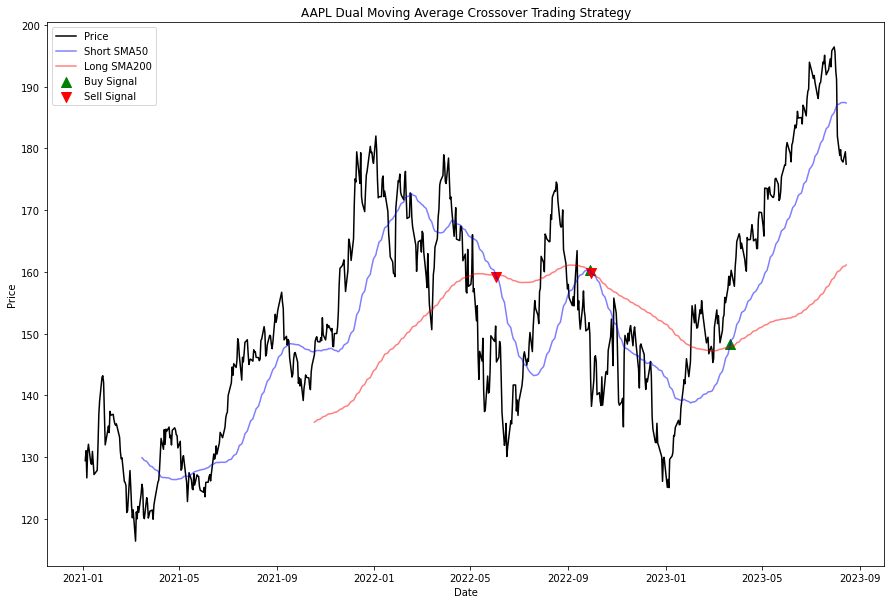

In [8]:
# Example usage:
dual_moving_average_crossover('AAPL', 50, 200)

## Technical Analysis using pandas-ta

https://github.com/twopirllc/pandas-ta

In [142]:
! pip install pandas-ta >null

In [9]:
# Bollinger Bands

'''
Bands are a popular technical analysis tool used in finance. 
They consist of a middle band and two outer bands that are standard deviations away
from a simple moving average. The bands expand and contract as volatility increases or decreases.

'''

import yfinance as yf
import pandas_ta as ta
import plotly.express as px
import pandas as pd

# Download Tesla's data starting from 2022-01-01
df = yf.download('TSLA', start='2023-01-01', progress=False)

# Use pandas-ta to calculate Bollinger Bands
bbands = ta.bbands(df['Close'])

# Join Bollinger Bands with original DataFrame
df = df.join(bbands)

# Create a new DataFrame to hold the required data
plot_df = pd.DataFrame({
    'Date': df.index,
    'Close': df['Close'],
    'Lower Band': df['BBL_5_2.0'],
    'Middle Band': df['BBM_5_2.0'],
    'Upper Band': df['BBU_5_2.0']
})

# Melt the DataFrame to have the bands and close price in the same column
plot_df = plot_df.melt(id_vars='Date', value_vars=['Close', 'Lower Band', 'Middle Band', 'Upper Band'])

# Create a line plot using Plotly Express
fig = px.line(plot_df, x='Date', y='value', color='variable', line_dash='variable',
              line_shape='linear', render_mode='auto', title='Bollinger Bands for TSLA')

# Update the close line to be thicker and black
fig.update_traces(line=dict(width=2, color='black'), selector=dict(variable='Close'))

# Show the plot
fig.show()

This code will display a slider that allows you to choose the RSI period. As you change the slider, the candlestick, volume, and RSI plots will update accordingly. Please note that this example is designed to run in a Jupyter Notebook, and you will need the **ipywidgets** library to use the interactive widgets.

In [148]:
! pip install ipywidgets >null
! jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [10]:
# Relative Strength Index(RSI)

'''
The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements.
The RSI oscillates between 0 and 100 and is typically used with a period of 14, which can be applied to any trading instrument.

'''
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to download data and clean missing values
def download_data(symbol, start_date):
    df = yf.download(symbol, start=start_date, progress=False)
    
    # Reindex to include all the days in the range
    all_days = pd.date_range(start=start_date, end=df.index[-1])
    df = df.reindex(all_days)
    
    # Forward-fill the missing values
    df.fillna(method='ffill', inplace=True)
    
    return df

# Function to create the plot
def plot_charts(symbol='TSLA', rsi_length=14):
    global df
    df = download_data(symbol, '2023-05-01')
    
    df['RSI'] = ta.rsi(df['Close'], length=rsi_length)
    
    fig = make_subplots(rows=3, cols=1, 
                        row_heights=[0.9, 0.3, 0.3],
                        vertical_spacing=0.06)

    # Add Candlestick plot
    fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close']), row=1, col=1)

    # Add Volume plot (without candlestick)
    fig.add_trace(go.Bar(x=df.index, y=[], marker=dict(color=df['Volume'], colorscale='Viridis')), row=2, col=1)

    # Add RSI plot
    fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], mode='lines', name='RSI'), row=3, col=1)
    fig.add_shape(type="line", x0=df.index[0], y0=70, x1=df.index[-1], y1=70, line=dict(color="Red"), row=3, col=1)
    fig.add_shape(type="line", x0=df.index[0], y0=30, x1=df.index[-1], y1=30, line=dict(color="Green"), row=3, col=1)

    # Update layout
    fig.update_layout(title=f'{symbol} - Candlestick, and RSI {rsi_length}')
    
    fig.show()

# Widgets
symbol_input = widgets.Text(value='TSLA', description='Symbol:', continuous_update=False)
rsi_length_widget = widgets.IntSlider(value=7, min=1, max=50, step=1, description='RSI Period:', continuous_update=False)

# Function to update the plot based on user input
def update_plot(change):
    clear_output(wait=True)
    display(symbol_input, rsi_length_widget)
    plot_charts(symbol=symbol_input.value, rsi_length=rsi_length_widget.value)

symbol_input.observe(update_plot, names='value')
rsi_length_widget.observe(update_plot, names='value')

# Display the widgets and initial plot
display(symbol_input, rsi_length_widget)
plot_charts()

Text(value='aapl', continuous_update=False, description='Symbol:')

IntSlider(value=18, continuous_update=False, description='RSI Period:', max=50, min=1)

In [11]:
# Here's a Python script that computes the buy and sell signals based on the RSI and calculates the total profit or loss.


import yfinance as yf
import pandas_ta as ta

def download_data(symbol, start_date):
    df = yf.download(symbol, start=start_date, progress=False)
    df.dropna(inplace=True)
    return df

def calculate_rsi(df, rsi_length=14):
    return ta.rsi(df['Close'], length=rsi_length)

def determine_sections(rsi):
    sections = []
    for i in range(len(rsi)): 
        if rsi[i] < 30:
            section = 'oversold'
        elif rsi[i] > 70:
            section = 'overbought'
        else:
            section = None
        sections.append(section)
    return sections

def determine_trades(sections):
    trades = []
    for i in range(1, len(sections)):
        trade = None
        if sections[i-1] == 'oversold' and sections[i] == None:
            trade = True
        if sections[i-1] == 'overbought' and sections[i] == None:
            trade = False
        trades.append(trade)
    return trades

def calculate_profit(df, trades, qty=10):
    acp = df['Close'][len(df['Close']) - len(trades):].values
    profit = 0
    for i in range(len(acp) - 1):
        true_trade = None
        if acp[i] < acp[i+1]:
            true_trade = True
        elif acp[i] > acp[i+1]:
            true_trade = False

        if trades[i] == true_trade:
            profit += abs(acp[i+1] - acp[i]) * qty
        elif trades[i] != true_trade and trades[i] != None:
            profit += -abs(acp[i+1] - acp[i]) * qty
    return profit

def execute_strategy(symbol, rsi_length=14, qty=10):
    df = download_data(symbol, '2023-01-01')
    rsi = calculate_rsi(df, rsi_length)
    sections = determine_sections(rsi)
    trades = determine_trades(sections)
    profit = calculate_profit(df, trades, qty)
    return profit

# Example usage
symbol = 'TSLA'
profit = execute_strategy(symbol)
print(f"Total profit for {symbol}: {profit}")


Total profit for TSLA: 149.00009155273438


# Mean Reversion Trading Strategies 

Mean reversion trading strategies are investment strategies that capitalize on asset prices deviating and then reverting back to a mean or average price over time. The idea is that assets, whether they are stocks, currencies, commodities, or other financial instruments, tend to fluctuate around a long-term average price. When prices deviate significantly from their historical averages, a mean-reverting trader will take positions that anticipate a return to the average price. Here are some common aspects of mean reversion strategies:

### Types of Mean Reversion Strategies

1. **Single Asset Mean Reversion**: In this strategy, traders look at the historical mean price of an asset. When the asset price deviates significantly from this mean, traders will buy if the price is low and sell if the price is high, anticipating a return to the mean.

2. **Pairs Trading**: This involves taking a long position in one asset and a short position in another, related asset when their prices diverge from a historical mean relationship. The idea is that the relative prices of the two assets will revert to the mean over time.

3. **Sector Mean Reversion**: Similar to pairs trading but involves multiple assets in a specific sector. For example, if tech stocks deviate from their mean valuation compared to the broader market, a sector mean reversion strategy could involve taking appropriate long and short positions across tech stocks and the broader market index.

4. **Currency Mean Reversion**: This strategy is often used in Forex markets. Traders identify currency pairs that have deviated from their historical average exchange rates and take positions that anticipate a reversion to the mean.

5. **Option-based Strategies**: Using options, traders can also create more complex mean-reversion strategies that can offer downside protection or leverage.

### Tools and Indicators

1. **Moving Averages**: Traders may use long-term and short-term moving averages to determine mean prices.

2. **Bollinger Bands**: This indicator consists of a middle band being an N-period simple moving average (SMA), an upper band at K times an N-period standard deviation above the middle band, and a lower band at K times an N-period standard deviation below the middle band.

3. **Relative Strength Index (RSI)**: This is used to identify overbought or oversold conditions.

4. **Z-Scores**: Statistical measures can be used to identify how many standard deviations an asset's price has moved from its mean.

### Risks and Limitations

1. **Non-Mean Reverting Markets**: Not all markets or assets are mean-reverting. In strongly trending markets, mean reversion strategies can fail.

2. **Fundamental Changes**: If the fundamentals of an asset have changed, the historical mean may no longer be relevant.

3. **Costs and Slippage**: Trading costs can eat into profits, especially for high-frequency mean reversion strategies.

4. **Psychological Stress**: These strategies often involve taking positions against the prevailing market trend, which can be stressful for traders.

5. **Statistical Nature**: The strategies are based on probabilities, so there are no guarantees.

Mean reversion strategies can be profitable, but they come with their own set of risks and limitations. Before deploying such a strategy, it's essential to conduct thorough back-testing and risk assessment.

## Single-stock mean reversion

Mean reversion in the context of a stock price implies that periods of the price being far below the mean are followed by periods of the price going up, and vice versa. We can take advantage of this by buying the stock to go long when the price is lower than expected, and selling to go short when the price is higher than expected. We can plot the price of a stock along with the mean of the prices up to each day to see whether the price reverts to the mean.  Note that since we are computing the running average, "reverting to the mean" does not necessarily mean going as high or as low as it did before. In order to trade using this strategy, we need to quantify what it means for the price to be higher or lower than expected. It's useful to compute the z-score of the price on each day, which tells us how many standard deviations away from the mean a value is: $$ z = \frac{x - \mu}{\sigma} $$
where $x$ is the value, $\mu$ is the mean of the data set, and $\sigma$ is its standard deviation. So a price with a z-score $> 1$ is more than one standard deviation above the mean, and we will sell short when this happens. If the price on a day has a z-score $< 1$, we will buy long. If the price is within half a standard deviation of the mean, we will clear all positions.

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

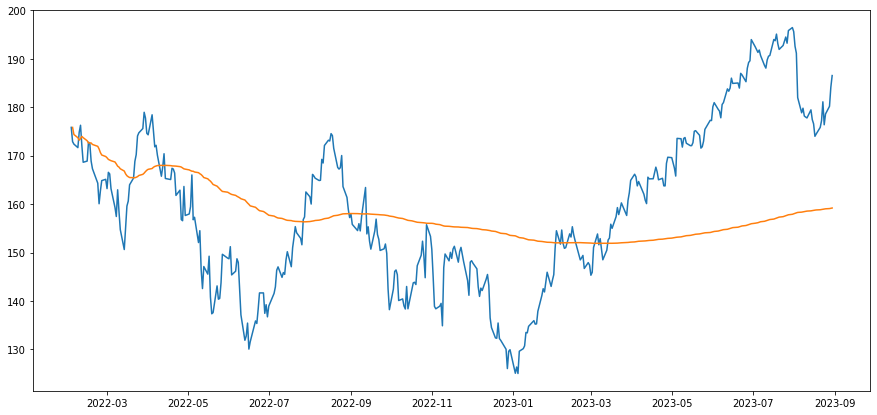

In [7]:
# Compute the cumulative moving average of the price
df = yf.download('AAPL', start='2022-02-02', progress=False)
df['mu'] = [df['Close'][:i].mean() for i in range(len(df))]
# Plot the price and the moving average
plt.figure(figsize=(15,7))
plt.plot(df['Close'])
plt.plot(df['mu']);
plt.show()

In [11]:
# Compute the z-scores for each day using the historical data up to that day
zscores = []
for i in range(len(df)):
    std = np.std(df['Close'][:i+1])  # Use i+1 to include the i-th element
    if std == 0:  # Prevent division by zero
        zscores.append(0)
    else:
        zscore = (df['Close'][i] - df['mu'][i]) / std
        zscores.append(zscore)

# Start with no money and no positions
money = 0
count = 0
for i in range(len(df)):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        money += df['Close'][i]
        count -= 1
    # Buy long if the z-score is < 1
    elif zscores[i] < -1:
        money -= df['Close'][i]
        count += 1
    # Clear positions if the z-score between -.5 and .5
    elif abs(zscores[i]) < 0.5:
        money += count*df['Close'][i]
        count = 0
print(money)

18556.52968597412


## Pairs Trading

[Definitiv Guide to Pairs Trading by](https://hudsonthames.org/wp-content/uploads/2022/02/DefinitivGuidetoPairsTrading.pdf) (hudsonthames.org)

[Statistical arbitrage pairs trading strategies: Review and outlook](https://onlinelibrary.wiley.com/doi/10.1111/joes.12153)

[The profitability of pairs trading strategies: distance, cointegration and copula methods](https://www.tandfonline.com/doi/abs/10.1080/14697688.2016.1164337)


In pairs trading, the quantity we are examining is the distance between two securities, which we expect to revert back to its mean. For this to be a reasonable assumption, we need the two securities to be statistically cointegrated. In practice, two companies whose products are substitutes for each other are often cointegrated. That is, they generally move together due to shifts in the market and in their specific industry, and move little relative to each other.
How do we incorporate the prediction about their difference into our portfolio? Suppose we are looking at two securities X and Y. Then we go long in X and short in Y when the two are closer together than expected, and short in X and long in Y when the two are far apart. In this way we remain neutral to the market, industry, and other shifts that cause X and Y to move together, while making money on their difference reverting to the mean. We can quantify "closer than expected" as the difference having a z-score of less than -1, and "farther apart than expected" as a z-score greater than 1. This is easier to picture if X's price is higher than Y's, but the end result is the same in either case.
Using the coint function from statsmodels, let's check whether HP and Microsoft stock prices are cointegrated.

In [28]:
from statsmodels.tsa.stattools import coint

# Load prices data for HP and Microsoft
data = yf.download(['KO', 'PEP'], start= '2020-01-01', end='2023-01-01', progress=False)
X = data['Close']['KO']
Y = data['Close']['PEP']
# Compute the p-value for the cointegration of the two series
coint_t, pvalue, crit_value = coint(X,Y)
print (coint_t, pvalue, crit_value)

-3.1890588079149764 0.07177666773730576 [-3.91100464 -3.34423482 -3.05007226]


Cointegration, very loosely speaking, is a "different" form of correlation. If two series are cointegrated, the ratio between them will vary around a mean. For pairs trading to work between two timeseries, the expected value of the ratio over time must converge to the mean, i.e. they should be cointegrated. 

The Null hypothesis is that there is no cointegration, the alternative hypothesis is that there is cointegrating relationship. If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.

The p-value is low, so the two series are cointegrated. Next we need to find the mean of the difference. We'll compute the cumulative moving average - that is, the average of all the values up to each day - as though we were looking at the data every day without knowing the future.

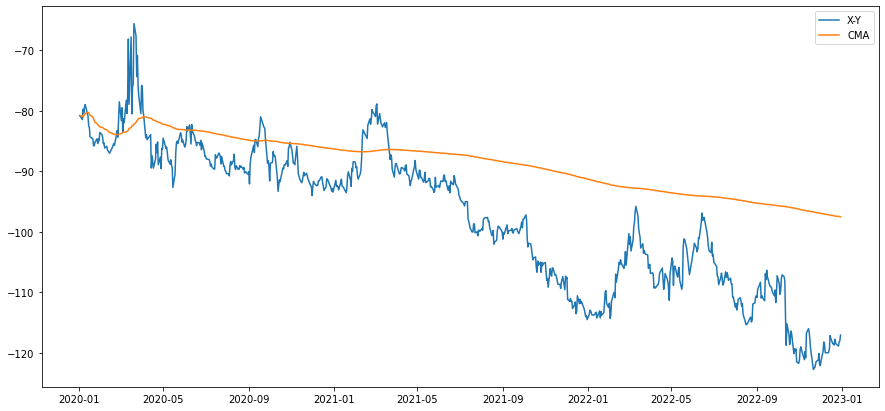

In [29]:
# Plot their difference and the cumulative moving average of their difference
val = pd.DataFrame(index = X.index, columns=['diff','mu'])
val['diff'] = X - Y
val['mu']= [val['diff'][:i].mean() for i in range(len(val['diff']))]
plt.figure(figsize=(15,7))
plt.plot(val['diff'], label='X-Y')
plt.plot(val['mu'], label='CMA')
plt.legend();

From here our trading strategy is identical to that for a single security, where we replace the asset with the spread X-Y. When we short the spread, we buy Y and sell X, and vice versa for going long. We'll be using the CMA for the mean, but you can easily change it to MA to see the difference. Keep in mind, however, that what works well with this data may not be suited for other situations, and each definition of the mean will sometimes outperform the other.

In [31]:
# Compute the z-score of the difference on each day, avoiding division by zero
zscores = []
for i in range(len(val['diff'])):
    if i == 0:
        zscores.append(0)  # or some other default value, since there's not enough data to compute z-score
    else:
        std_dev = np.std(val['diff'][:i])
        if std_dev != 0:
            zscores.append((val['diff'][i] - val['mu'][i]) / std_dev)
        else:
            zscores.append(0)  # or some other default value

# Start with no money and no positions
money = 0
count = 0

for i in range(len(val['diff'])):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        money += val['diff'][i]
        count -= 1
    # Buy long if the z-score is < -1
    elif zscores[i] < -1:
        money -= val['diff'][i]
        count += 1
    # Clear positions if the z-score between -0.5 and 0.5
    elif abs(zscores[i]) < 0.5:
        money += count * val['diff'][i]
        count = 0
        
print(money)

16767.31093978882


## Market Screener for Pairs Trading Strategy

In [34]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

In [35]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2, maxlag=1)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [58]:
import yfinance as yf

# List of S&P 100 symbols
symbols = ['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL', 'GOOG', 'JNJ', 'JPM', 'V', 'PG', 'UNH', 'MA', 'INTC', 'VZ', 'HD', 'T', 'PFE', 'MRK', 'PEP', 'NVS', 'MO', 'KO', 'CMCSA', 'NFLX', 'PM', 'NVDA', 'XOM', 'DIS', 'CSCO', 'ADBE', 'PYPL', 'CVX', 'BAC', 'WFC', 'BA', 'MCD', 'ABT', 'ORCL', 'ACN', 'IBM', 'C', 'MDT', 'UNP', 'MMM', 'BMY', 'HON', 'LIN', 'SAP', 'CRM', 'TXN', 'TMO', 'NKE', 'AVGO', 'QCOM', 'LLY', 'DHR', 'NEE', 'AMGN', 'BUD', 'SBUX', 'GE', 'CAT', 'RTX', 'GS', 'AXP', 'SPG', 'CVS', 'TSLA', 'COST', 'UPS', 'CHTR', 'LMT', 'CI', 'TJX', 'DUK', 'WBA', 'LOW', 'AMT', 'BKNG', 'SYK', 'GILD', 'ISRG', 'BIIB', 'USB', 'PNC', 'MU', 'ZTS', 'BLK', 'PLD', 'CB', 'EOG', 'MMC', 'ATVI', 'INTU', 'ADP', 'CSX', 'BDX', 'ITW', 'VRTX', 'FIS', 'REGN', 'CTSH', 'TFC', 'CCI', 'FDX', 'SQ', 'NOW', 'D']
symbols = symbols[0:30]
data = yf.download(symbols, start='2014-02-01', end='2015-01-01')

# Closing prices
closing_prices = data['Close']
cleaned_data = closing_prices.copy()
cleaned_data = cleaned_data.dropna(axis=1, how='all')
cleaned_data = cleaned_data.dropna(axis=0, how='any')
prices_df = cleaned_data
prices_df.head(2)

[*********************100%***********************]  30 of 30 completed


AAPL       ADBE       AMZN   CMCSA       CSCO        DIS  \
Date                                                                        
2014-02-03  17.911785  58.090000  17.307501  26.385  21.549999  69.989998   
2014-02-04  18.171070  59.720001  17.397499  26.760  21.799999  71.050003   

                 GOOG      GOOGL         HD       INTC  ...        NVS    PEP  \
Date                                                    ...                     
2014-02-03  28.229937  28.364115  75.089996  23.950001  ...  70.448029  78.57   
2014-02-04  28.347746  28.482483  74.970001  23.820000  ...  70.071686  78.82   

                  PFE         PG         PM          T        UNH          V  \
Date                                                                           
2014-02-03  29.032257  75.699997  75.389999  24.131420  70.739998  53.367500   
2014-02-04  29.829222  76.089996  76.879997  24.509064  70.510002  53.634998   

               VZ        XOM  
Date                          
2014-02-03  46.41  90.050003  
2014-02-04  46.82  90.019997  

[2 rows x 30 columns]

Text(0.5, 1.0, 'Assets Correlation Matrix')

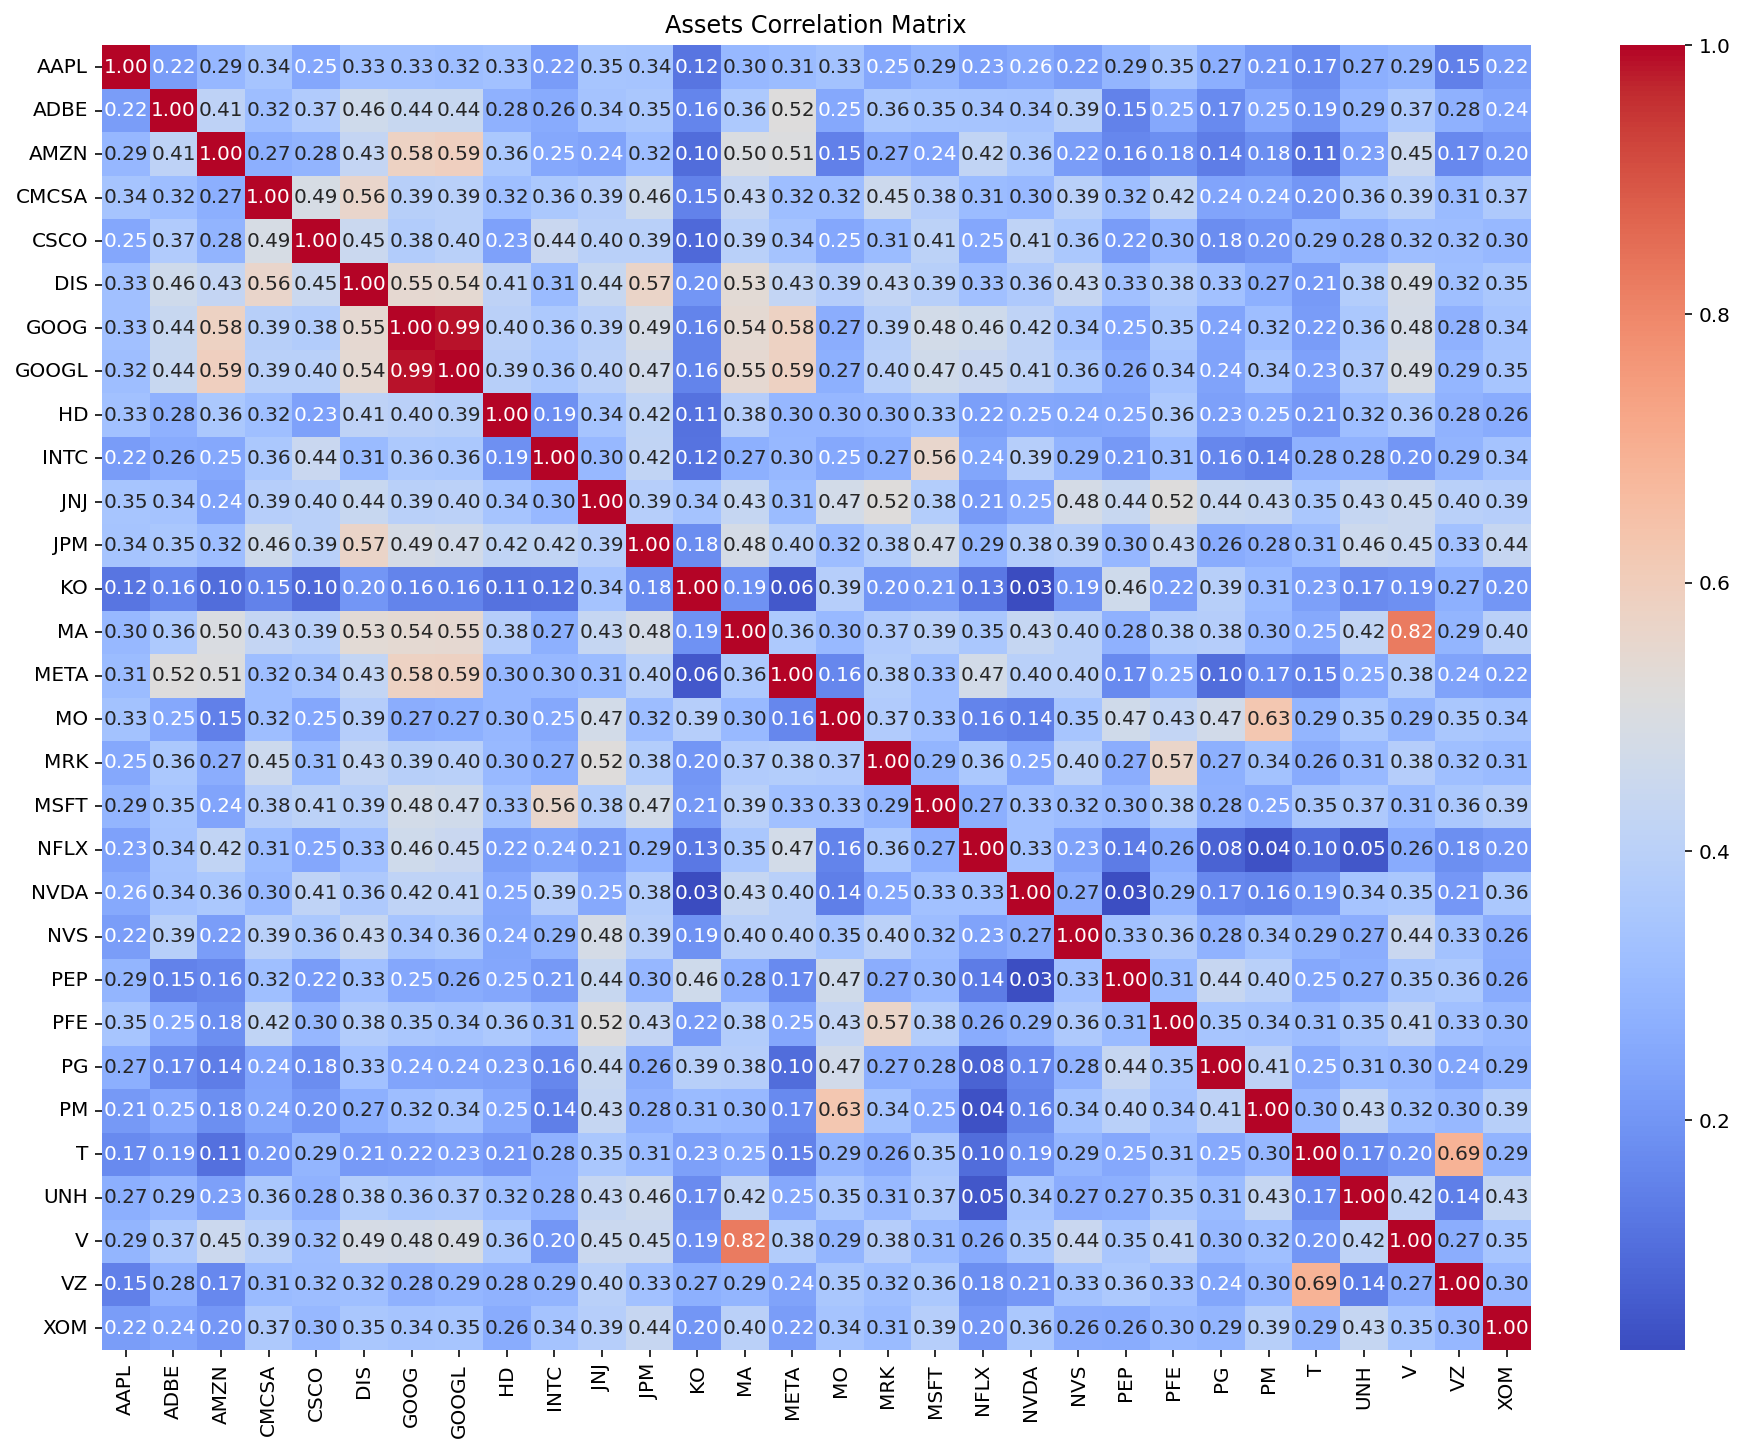

In [59]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(prices_df.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')

[('AAPL', 'DIS'), ('AAPL', 'PEP'), ('ADBE', 'CMCSA'), ('CMCSA', 'DIS'), ('DIS', 'HD'), ('DIS', 'INTC'), ('DIS', 'META'), ('DIS', 'MO'), ('DIS', 'MSFT'), ('DIS', 'PEP'), ('DIS', 'UNH'), ('DIS', 'V'), ('GOOGL', 'NFLX'), ('JNJ', 'NVS'), ('JPM', 'UNH'), ('JPM', 'XOM'), ('KO', 'NVS'), ('KO', 'PEP'), ('MA', 'V'), ('MRK', 'MSFT'), ('MRK', 'NFLX'), ('MRK', 'NVDA'), ('MRK', 'NVS'), ('MRK', 'PEP'), ('MRK', 'PFE'), ('MRK', 'PG'), ('MRK', 'PM'), ('MRK', 'T'), ('MRK', 'UNH'), ('MRK', 'V'), ('MRK', 'VZ'), ('MRK', 'XOM'), ('MSFT', 'PEP'), ('NVDA', 'PEP'), ('NVDA', 'PG'), ('NVDA', 'UNH'), ('NVDA', 'V'), ('PM', 'VZ')]


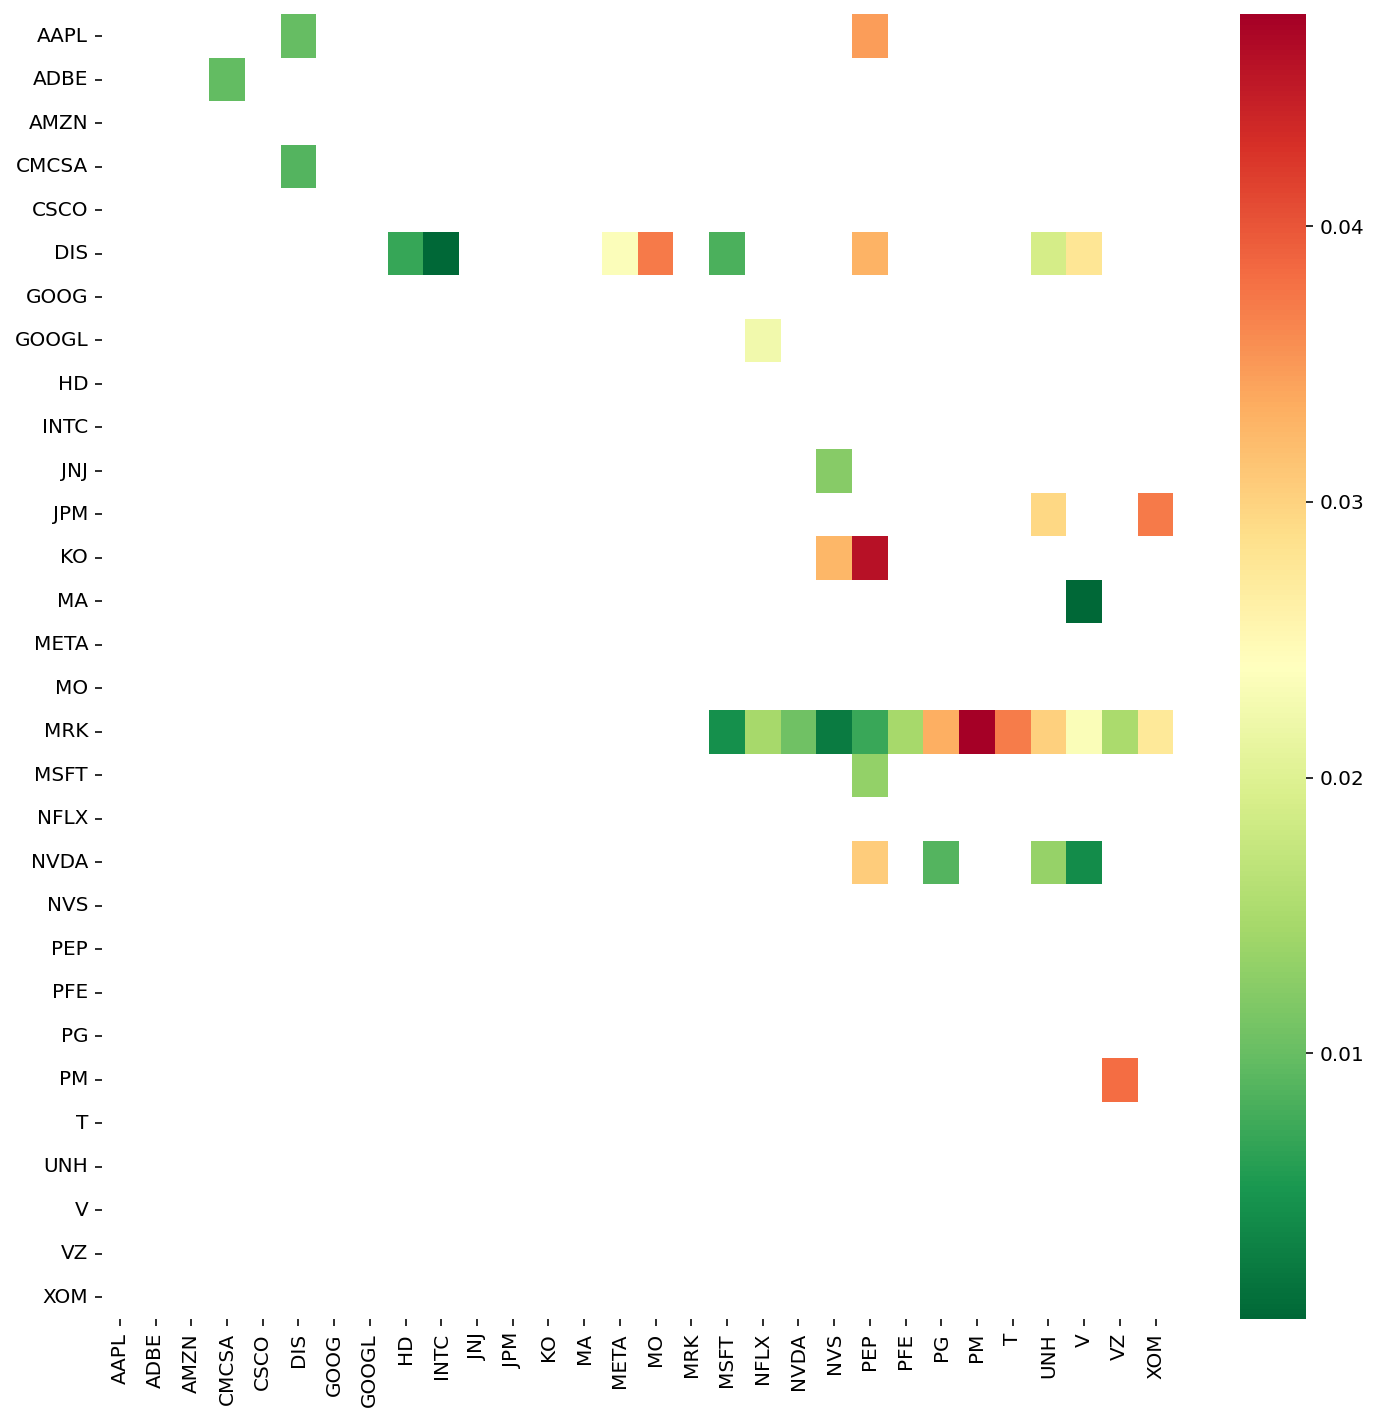

In [60]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs(prices_df)
import seaborn

plt.figure(figsize=(12, 12)) 

seaborn.heatmap(
    pvalues,
    xticklabels=prices_df.columns,
    yticklabels=prices_df.columns,
    cmap='RdYlGn_r',
    mask = (pvalues >= 0.05))
print(pairs)
plt.show()

In [46]:
S1 = prices_df['DIS']  # The Walt Disney Company (DIS)
S2 = prices_df['INTC']  # Intel Corporation (INTC)

In [47]:
score, pvalue, _ = coint(S1, S2, maxlag=1)
pvalue

0.00036335369645976916

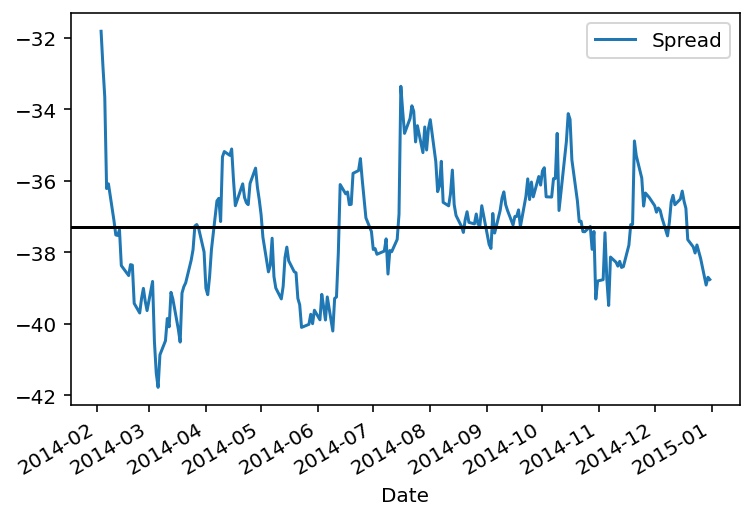

In [48]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['DIS']
b = results.params['DIS']

spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

In [49]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

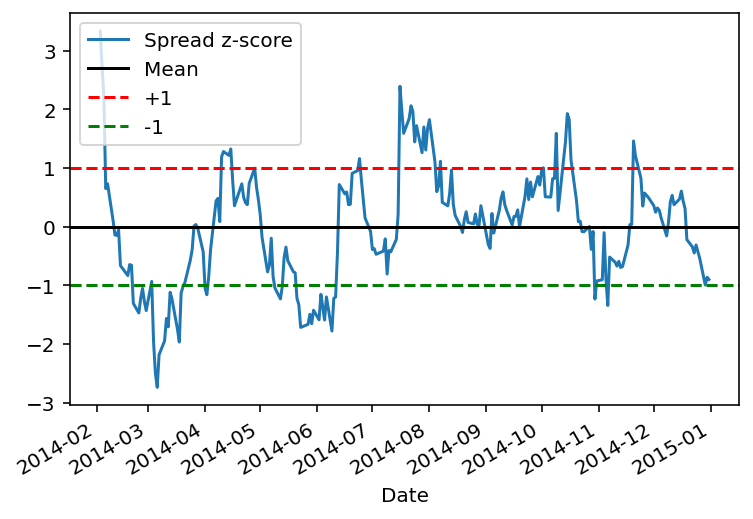

In [50]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

In [61]:
# Create a DataFrmae with the signal and position size in the pair
trades = pd.concat([zscore(spread), S2 - b * S1], axis=1)
trades.columns = ["signal", "position"]

# Add a long and short position at the z-score levels
trades["side"] = 0.0
trades.loc[trades.signal <= -1, "side"] = 1
trades.loc[trades.signal >= 1, "side"] = -1

<AxesSubplot:xlabel='Date'>

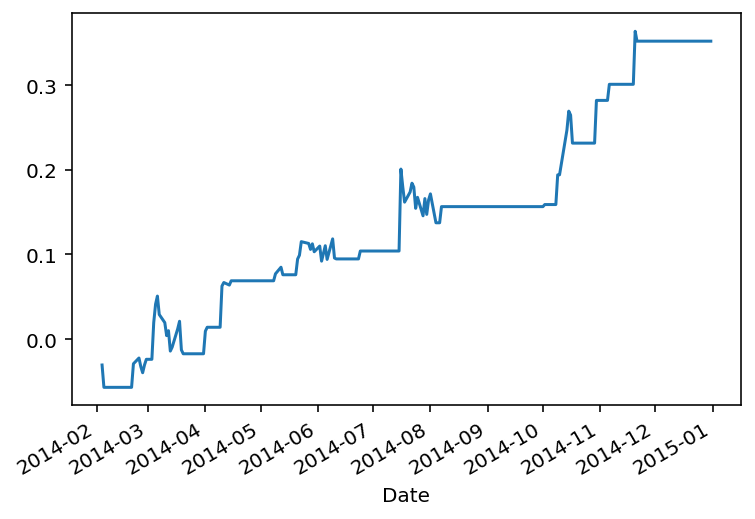

In [62]:
returns = trades.position.pct_change() * trades.side
returns.cumsum().plot()